In [1]:
%matplotlib inline

#plt.figure(figsize=(30,30))
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [2]:
def getPR(req_mu, drp_mu):
    P = [[0 for x in range(21)] for x in range(26)]
    R = [0 for x in range(26)]
    p_req = poisson.pmf(0, req_mu)
    req = 0
    while p_req > 0.00001:
        for n in range(26):
            R[n] = R[n] + 10 * p_req * min(n, req)
        p_drp = poisson.pmf(0, drp_mu)
        drp = 0
        while p_drp > 0.00001:
            for n in range(26):
                satisfied_req = min(n, req)
                next_n = min(20, drp + n - satisfied_req)
                P[n][next_n] = P[n][next_n] + p_req*p_drp
            drp += 1
            p_drp = poisson.pmf(drp, drp_mu)
        req += 1
        p_req = poisson.pmf(req, req_mu)
    return P,R

In [3]:
P1,R1 = getPR(3,3)
P2,R2 = getPR(4,2)

In [4]:
gamma = 0.9
def backup_action(n1, n2, a):
    a = max(-n2, min(n1, a))
    a = max(-5, min(5, a))
    v = -2 * abs(a)
    morning_n1 = n1 - a
    morning_n2 = n2 + a
    for new_n1 in range(21):
        for new_n2 in range(21):
            v = v + P1[morning_n1][new_n1] * P2[morning_n2][new_n2] * \
            (R1[morning_n1] + R2[morning_n2] + gamma * V[new_n1][new_n2])
    return v

In [5]:
def policy(n1, n2):
    best_value = -1
    best_action = 0
    for a in range(max(-5, -n2), min(n1, 5)+1):
        v = backup_action(n1, n2, a)
        if v > best_value + 0.0000001:
            best_action = a
            best_value = v
    return best_action

def policy_eval():
    while True:
        delta = 0
        for n1 in range(21):
            for n2 in range(21):
                old_v = V[n1][n2]
                a = Policy[n1][n2]
                V[n1][n2] = backup_action(n1, n2, a)
                delta = max(delta, abs(V[n1][n2] - old_v))
        if delta < 0.0001:
            return

In [6]:
def show_policy():
    ac = np.zeros((20, 20))
    for i in range(20):
        for j in range(20):
            ac[i,j] = Policy[i][j]
    plt.subplot(1,1,1)
    c = plt.pcolor(ac)
    plt.colorbar()
    plt.show()

def improve():
    improved = False
    for n1 in range(21):
        for n2 in range(21):
            old = Policy[n1][n2]
            Policy[n1][n2] = policy(n1, n2)
            if old != Policy[n1][n2]:
                improved = True
    if improved:
        show_policy()
    return improved

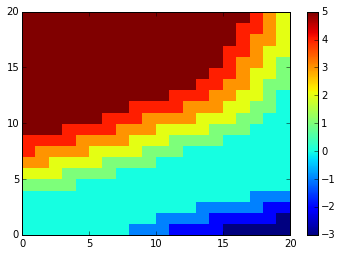

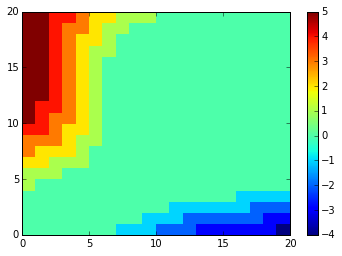

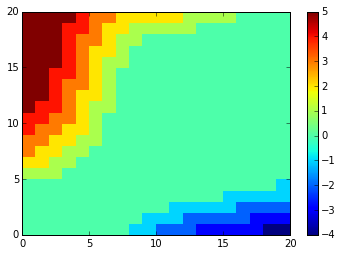

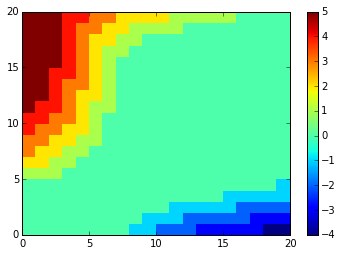

final policy


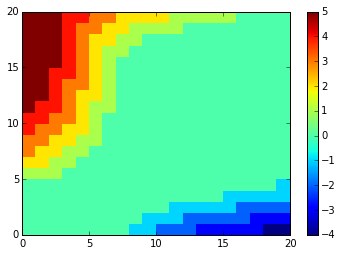

In [7]:
Policy = [[0 for x in range(21)] for x in range(21)]
V = [[0 for x in range(21)] for x in range(21)]
while True:
    policy_eval()
    if not improve():
        break
print "final policy"
show_policy()
    